Lending Loan Club Data Analysis -Statistical Report 

I am trying to see if there is any siginificant changes in the loan status because of the loan amount 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('loan.csv',low_memory=False)

In [2]:
#Dropping columns where there is more than 25% of null values
thresh = len(df) * .25
df.dropna(thresh = thresh, axis = 1, inplace = True)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [4]:
df_new = df.loc[:,['loan_amnt',
       'loan_status']]

In [5]:
df_new.head()

,loan_amnt,loan_status
0,5000.0,Fully Paid
1,2500.0,Charged Off
2,2400.0,Fully Paid
3,10000.0,Fully Paid
4,3000.0,Current


In [6]:
#As we could see that there are no missing values in the data frame
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 2 columns):
loan_amnt      887379 non-null float64
loan_status    887379 non-null object
dtypes: float64(1), object(1)
memory usage: 13.5+ MB


In [7]:
df_new['loan_status'] = df_new['loan_status'].astype('category')

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 2 columns):
loan_amnt      887379 non-null float64
loan_status    887379 non-null category
dtypes: category(1), float64(1)
memory usage: 7.6 MB


In [9]:
df_new['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [10]:
df_new = df_new.loc[df_new['loan_status'].isin(['Current','Fully Paid','Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default'])]
df_new.dropna(axis = 0, inplace = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876170 entries, 0 to 887378
Data columns (total 2 columns):
loan_amnt      876170 non-null float64
loan_status    876170 non-null category
dtypes: category(1), float64(1)
memory usage: 14.2 MB


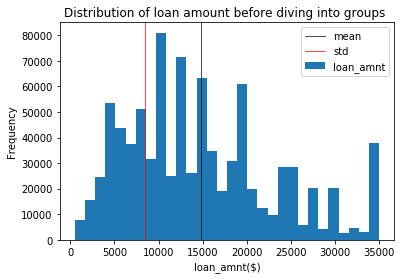

In [11]:
df_new['loan_amnt'].plot.hist(bins=30)
plt.xlabel('loan_amnt($)')
plt.title('Distribution of loan amount before diving into groups ')
plt.axvline(df_new['loan_amnt'].mean(), c='k',label='mean',linewidth=0.7)
plt.axvline(df_new['loan_amnt'].std(ddof=1), c='red',label='std',linewidth=0.7)
plt.legend()
plt.show()

In [12]:
print(df_new['loan_amnt'].mean())

14767.950797219717


In [13]:
print(df_new['loan_amnt'].std(ddof=1))

8430.721087353251


In [14]:
df_fully_paid = df_new.loc[df_new['loan_status'].isin(['Fully Paid'])]
df_current = df_new.loc[df_new['loan_status'].isin(['Current','Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default'])]

Null Hypothesis : The mean loan amnt with a default loan status is the same as that of the non default loan status

Alternate Hypothesis : The mean loan amnt with a default loan status is not the same as that of the non default loan status

In [15]:
Fully_paid_mean = df_fully_paid.loan_amnt.mean()

In [16]:
Current_mean = df_current.loan_amnt.mean()

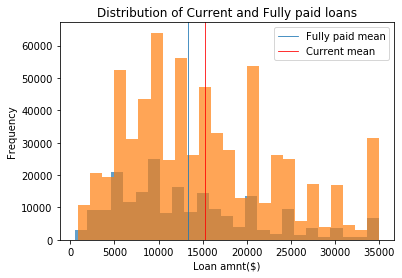

In [17]:

plt.hist(df_fully_paid['loan_amnt'],bins=25,alpha=0.7)
plt.hist(df_current['loan_amnt'],bins=25,alpha=0.7)

plt.axvline(Fully_paid_mean,label='Fully paid mean',linewidth=0.8)
plt.axvline(Current_mean,label='Current mean',linewidth=0.8,c='red')

plt.title('Distribution of Current and Fully paid loans')
plt.ylabel('Frequency')
plt.xlabel('Loan amnt($)')
plt.legend()
plt.show()

In [18]:
from scipy.stats import t
import scipy.stats as st
import numpy as np
cv_left_tail = st.norm.ppf(.05)
cv = st.norm.ppf(.95)

In [19]:
upper_bound = df_new['loan_amnt'].mean()+cv*df_new['loan_amnt'].std(ddof=1)/np.sqrt(len(df_new))
lower_bound = df_new['loan_amnt'].mean()-cv*df_new['loan_amnt'].std(ddof=1)/np.sqrt(len(df_new))

lower_bound,upper_bound

(14753.135929121165, 14782.76566531827)

In [20]:
fullypaid_stats = np.array(df_fully_paid['loan_amnt'])
current_stats = np.array(df_current['loan_amnt'])

In [21]:
Fmean = np.mean(fullypaid_stats)
Cmean = np.mean(current_stats)

In [22]:
print(Cmean)

15209.71954395786


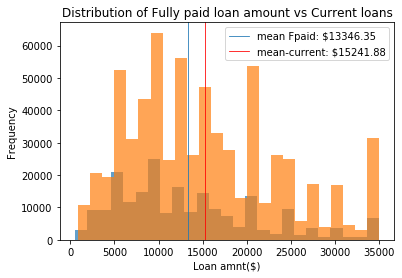

In [23]:
plt.hist(fullypaid_stats,bins=25,alpha=0.7)
plt.hist(current_stats,bins=25,alpha=0.7)

plt.axvline(Fmean,label='mean Fpaid: $13346.35',linewidth=0.8)
plt.axvline(Cmean,label='mean-current: $15241.88',linewidth=0.8,c='red')

plt.title('Distribution of Fully paid loan amount vs Current loans')
plt.ylabel('Frequency')
plt.xlabel('Loan amnt($)')
plt.legend()
plt.show()

In [24]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


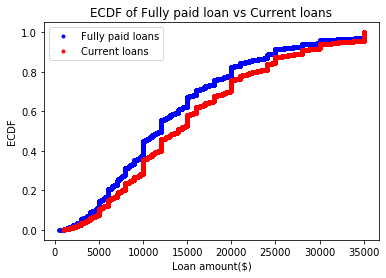

In [25]:
x_full, y_full = ecdf(fullypaid_stats)
x_current, y_current = ecdf(current_stats)
plt.plot(x_full, y_full, linestyle='none',marker='.',c='blue',label='Fully paid loans')
plt.plot(x_current, y_current, linestyle='none',marker='.',c='red',label='Current loans')

plt.title('ECDF of Fully paid loan vs Current loans')
plt.ylabel('ECDF')
plt.xlabel('Loan amount($)')
plt.legend()
plt.show()

In [26]:
#Pooled Std deviation
n_one = len(fullypaid_stats)
n_two = len(current_stats)

sd_one = np.std(fullypaid_stats)**2
sd_two = np.std(current_stats)**2

numerator = (n_one-1)*sd_one + (n_two-1)*sd_two
denominator = n_one+n_two-2

pooled_std = np.sqrt(numerator/denominator)

In [27]:
#t test 
t_numerator = Fmean - Cmean
t_denominator = pooled_std*np.sqrt(1/n_one + 1/n_two)

t_test = t_numerator/t_denominator

t_test

-88.3777766660167

In [28]:
# p-value (manual)
p_value  = 1 - st.t.cdf(t_test,len(df_new)-1)
p_value_survival_function = st.t.sf(t_test,len(df_new)-1)*2

p_value,p_value_survival_function

(1.0, 2.0)

In [29]:
st.ttest_ind(fullypaid_stats,current_stats,equal_var=True)

Ttest_indResult(statistic=-88.37767852521944, pvalue=0.0)

In [30]:
st.ttest_ind(fullypaid_stats,current_stats,equal_var=False)

Ttest_indResult(statistic=-90.86892048976794, pvalue=0.0)

Since we got a p value which is less, we could neglect the null hypothesis and accept the alternate hypothesis 

Thus we could infer that both the groups are different and the loan amount plays an imporatant feature in the repayment process